In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import spectral_clustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

In [2]:
# read movies from file
df_movies = pd.read_csv('movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
#On va donc utiliser la fonction explode pour avoir une ligne par genre
df_movies['genres'] = df_movies['genres'].str.split('|')
df_movies = df_movies.explode('genres')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


In [4]:
#Drop the genres thar are 'no genres listed'
df_movies = df_movies[df_movies['genres'] != '(no genres listed)']

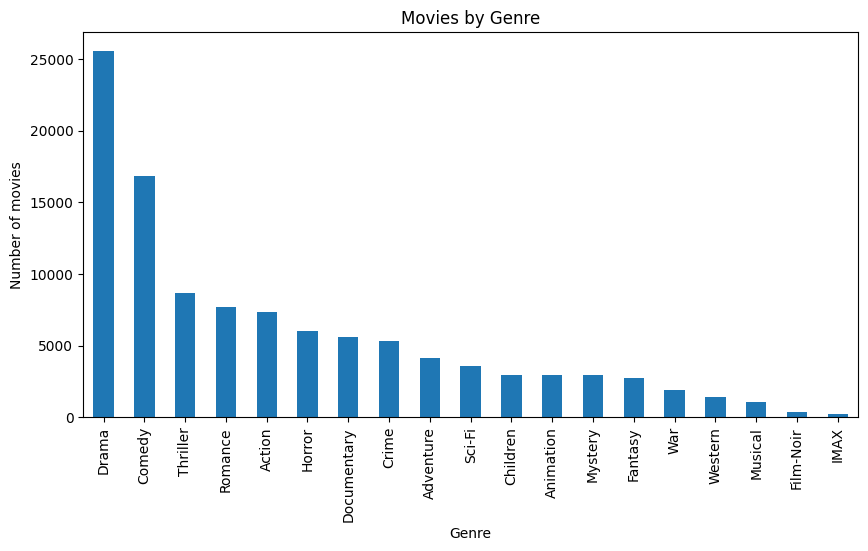

In [5]:
#Plot les films par genre et ignorer les genres inconnus
df_movies['genres'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Movies by Genre')
plt.ylabel('Number of movies')
plt.xlabel('Genre')
plt.show()

# Question 2

En ignorant les films non listés, on vous demande d’extraire le nouveau jeu de données movies1.csv et ratings1.csv.

In [6]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings.shape[0]


25000095

<Axes: xlabel='rating'>

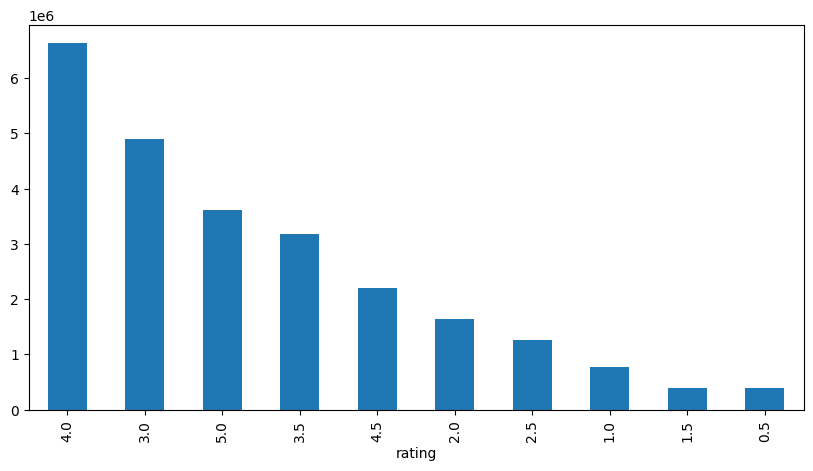

In [7]:
df_ratings = df_ratings[df_ratings['movieId'].isin(df_movies['movieId'])]
df_ratings.shape[0]
df_ratings['rating'].value_counts().plot(kind='bar', figsize=(10,5))


<Axes: xlabel='rating'>

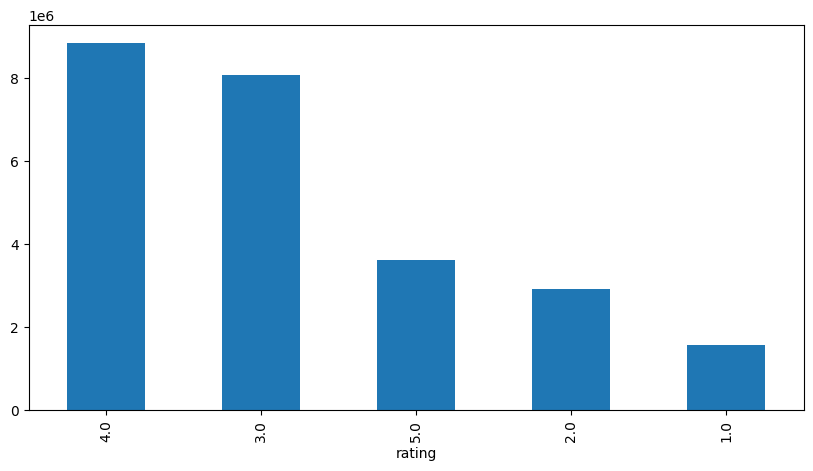

In [8]:

df_ratings.loc[df_ratings['rating'] == 5.5, 'rating'] = 5
df_ratings.loc[df_ratings['rating'] == 4.5, 'rating'] = 4
df_ratings.loc[df_ratings['rating'] == 3.5, 'rating'] = 3
df_ratings.loc[df_ratings['rating'] == 2.5, 'rating'] = 2
df_ratings.loc[df_ratings['rating'] == 1.5, 'rating'] = 1
df_ratings.loc[df_ratings['rating'] == 0.5, 'rating'] = 1
df_ratings['rating'].value_counts().plot(kind='bar', figsize=(10,5))


In [9]:
#Create a new csv file with the new dataframe
df_movies.to_csv('movies1.csv', index=False)
df_ratings.to_csv('ratings1.csv', index=False)

# Question 3

Matrice binaire de contenu 

In [10]:
#Make a binary matrix with the movies according to the genres 
df_movies = pd.read_csv('movies1.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy


In [11]:
#Make a binary matrix with the movies according to the genres with the new movies1.csv
df_movies = pd.read_csv('movies1.csv')

#Create a new dataframe with the genres as columns
df_movies_genres = pd.get_dummies(df_movies['genres'])

#Add the movieId column
df_movies_genres['movieId'] = df_movies['movieId']

#Combine the rows with the same movieId
df_movies_genres = df_movies_genres.groupby('movieId').sum()

df_movies_genres.head()




,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Question 4

Construire la matrice de profil utilisateur


In [12]:
df_ratings = pd.read_csv('ratings1.csv')

df_ratings['userId'].nunique()


162541

In [13]:
#User profile matrix
df_user_profiles = df_ratings.merge(df_movies_genres, on='movieId', how='inner')


df_user_profiles.head()

,userId,movieId,rating,timestamp,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,296,5.0,1147880044,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,3,296,5.0,1439474476,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
2,4,296,4.0,1573938898,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,5,296,4.0,830786155,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,7,296,4.0,835444730,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [14]:

#Multiply the user profile matrix with the binary matrix 
df_user_profiles.iloc[:, 4:] = df_user_profiles.iloc[:, 4:].multiply(df_user_profiles['rating'], axis=0)

df_user_profiles.drop(['rating','timestamp','movieId'], axis=1, inplace=True)
df_user_profiles = df_user_profiles.groupby('userId').sum()
df_user_profiles.head()



,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,
1,16.0,39.0,8.0,11.0,84.0,31.0,2.0,196.0,16.0,3.0,3.0,0.0,18.0,13.0,71.0,17.0,21.0,19.0,2.0
2,237.0,285.0,58.0,87.0,202.0,55.0,0.0,316.0,111.0,0.0,12.0,28.0,34.0,29.0,105.0,109.0,112.0,50.0,12.0
3,1160.0,696.0,193.0,171.0,583.0,496.0,9.0,876.0,276.0,21.0,152.0,290.0,21.0,224.0,204.0,786.0,839.0,93.0,28.0
4,424.0,325.0,100.0,82.0,271.0,136.0,20.0,174.0,103.0,0.0,30.0,90.0,24.0,64.0,32.0,251.0,183.0,28.0,24.0
5,67.0,81.0,15.0,30.0,175.0,58.0,0.0,172.0,28.0,0.0,14.0,12.0,26.0,33.0,71.0,45.0,96.0,9.0,15.0


# Question 5
Regroupement spectral avec k={2,3,4,5} en utilisant la matrice de profil utilisateur

In [15]:
df_sample = df_user_profiles.sample(n=1000, random_state=1)

In [18]:

k_clusters = [2, 3, 4, 5]
silhouette_scores = []

#Check if dataframe contains NaN values and create a new dataframe with the rows that contain NaN values



for index in range(len(k_clusters)):
    clustering = SpectralClustering(n_clusters=k_clusters[index],assign_labels="discretize", affinity="nearest_neighbors").fit(df_sample)
    silhouette_scores.append(silhouette_score(df_sample, clustering.labels_))
print(silhouette_scores)

[0.5182154899097804, 0.310907033331986, 0.23319539245166396, 0.19076428068815582]
